<a href="https://colab.research.google.com/github/Aman811630/TED-talks-views-Prediction--ML-project/blob/main/Aman_Singh_ML_project_on_TED_talks_views_prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - ***TED Talks Views Prediction***



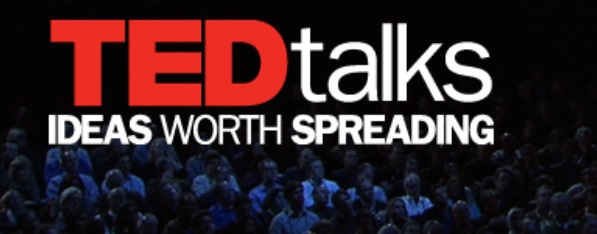

##### **Project Type**    - Regression
##### **Contribution**    - Individual
##### **Name -** AMAN SINGH


# **Project Summary -**

We have the data of previous TED talk events , which contains data points such as the length (duration ) of the talk, topics , speaker occupation and textual features such as Transcript , Title , and Description And most importantly , the target variable : the view of the video
The Data is available for 4005 TED talks .



# **GitHub Link -**

https://github.com/Aman811630/TED-talks-views-Prediction--ML-project

# **Problem Statement**



The main objective is to build a predictive model, which could help in predicting the views of the videos uploaded on the TEDx website.





# **General Guidelines** : -

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.

     The additional credits will have advantages over other students during Star Student selection.

             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.


```
# Chart visualization code
```


*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Importing the libraries

import numpy as np
import pandas as pd
from numpy import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [2]:
# Load dataset

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
file_path="/content/drive/MyDrive/data_ted_talks.csv"

In [4]:
ted_talk_df=pd.read_csv("/content/drive/MyDrive/data_ted_talks.csv")


### Dataset First View

In [5]:
# Dataset First Look

ted_talk_df.head(5)

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,related_talks,url,description,transcript
0,1,Averting the climate crisis,Al Gore,{0: 'Al Gore'},{0: ['climate advocate']},{0: 'Nobel Laureate Al Gore focused the world’...,3523392,2006-02-25,2006-06-27,TED2006,en,"['ar', 'bg', 'cs', 'de', 'el', 'en', 'es', 'fa...",272.0,977,"['alternative energy', 'cars', 'climate change...","{243: 'New thinking on the climate crisis', 54...",https://www.ted.com/talks/al_gore_averting_the...,With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre..."
1,92,The best stats you've ever seen,Hans Rosling,{0: 'Hans Rosling'},{0: ['global health expert; data visionary']},"{0: 'In Hans Rosling’s hands, data sings. Glob...",14501685,2006-02-22,2006-06-27,TED2006,en,"['ar', 'az', 'bg', 'bn', 'bs', 'cs', 'da', 'de...",628.0,1190,"['Africa', 'Asia', 'Google', 'demo', 'economic...","{2056: ""Own your body's data"", 2296: 'A visual...",https://www.ted.com/talks/hans_rosling_the_bes...,You've never seen data presented like this. Wi...,"About 10 years ago, I took on the task to teac..."
2,7,Simplicity sells,David Pogue,{0: 'David Pogue'},{0: ['technology columnist']},{0: 'David Pogue is the personal technology co...,1920832,2006-02-24,2006-06-27,TED2006,en,"['ar', 'bg', 'de', 'el', 'en', 'es', 'fa', 'fr...",124.0,1286,"['computers', 'entertainment', 'interface desi...","{1725: '10 top time-saving tech tips', 2274: '...",https://www.ted.com/talks/david_pogue_simplici...,New York Times columnist David Pogue takes aim...,"(Music: ""The Sound of Silence,"" Simon & Garfun..."
3,53,Greening the ghetto,Majora Carter,{0: 'Majora Carter'},{0: ['activist for environmental justice']},{0: 'Majora Carter redefined the field of envi...,2664069,2006-02-26,2006-06-27,TED2006,en,"['ar', 'bg', 'bn', 'ca', 'cs', 'de', 'en', 'es...",219.0,1116,"['MacArthur grant', 'activism', 'business', 'c...",{1041: '3 stories of local eco-entrepreneurshi...,https://www.ted.com/talks/majora_carter_greeni...,"In an emotionally charged talk, MacArthur-winn...",If you're here today — and I'm very happy that...
4,66,Do schools kill creativity?,Sir Ken Robinson,{0: 'Sir Ken Robinson'},"{0: ['author', 'educator']}","{0: ""Creativity expert Sir Ken Robinson challe...",65051954,2006-02-25,2006-06-27,TED2006,en,"['af', 'ar', 'az', 'be', 'bg', 'bn', 'ca', 'cs...",4931.0,1164,"['children', 'creativity', 'culture', 'dance',...","{865: 'Bring on the learning revolution!', 173...",https://www.ted.com/talks/sir_ken_robinson_do_...,Sir Ken Robinson makes an entertaining and pro...,Good morning. How are you? (Audience) Good. It...


In [6]:
ted_talk_df.tail(5)

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,related_talks,url,description,transcript
4000,62678,"Crisis support for the world, one text away",Nancy Lublin,{0: 'Nancy Lublin'},{0: ['health activist']},"{0: 'Nancy Lublin, cofounder and CEO of Crisis...",502934,2020-04-22,2020-04-27,TED2020: The Prequel,en,['en'],6.0,690,"['activism', 'data', 'technology', 'mental hea...",{2362: 'How data from a crisis text line is sa...,https://www.ted.com/talks/nancy_lublin_crisis_...,What if we could help people in crisis anytime...,"""I'm 14, and I want to go home."" ""My name is B..."
4001,62782,The dark history of IQ tests,Stefan C Dombrowski,{0: 'Stefan C Dombrowski'},NaN,NaN,307187,2020-04-27,2020-04-27,TED-Ed,en,"['en', 'es', 'my', 'pt-br']",NaN,346,"['TED-Ed', 'education', 'history', 'animation'...",{35386: 'How does the Rorschach inkblot test w...,https://www.ted.com/talks/stefan_c_dombrowski_...,"In 1905, psychologists Alfred Binet and Théodo...","In 1905, psychologists Alfred Binet and Théodo..."
4002,62263,"How ""policing for profit"" undermines your rights",Dick M. Carpenter II,{0: 'Dick M. Carpenter II'},{0: ['law researcher']},{0: 'Dick M. Carpenter II studies cutting edge...,464414,2019-06-22,2020-04-28,TEDxMileHigh,en,['en'],9.0,774,"['society', 'law', 'policy', 'justice system',...","{2406: 'I love being a police officer, but we ...",https://www.ted.com/talks/dick_m_carpenter_ii_...,"Many countries have an active, centuries-old l...",Picture yourself driving down the road tomorro...
4003,62784,The electrifying speeches of Sojourner Truth,Daina Ramey Berry,{0: 'Daina Ramey Berry'},NaN,NaN,56582,2020-04-28,2020-04-30,TED-Ed,en,['en'],NaN,257,"['TED-Ed', 'education', 'animation', 'United S...",{20973: 'The breathtaking courage of Harriet T...,https://www.ted.com/talks/daina_ramey_berry_th...,Isabella Baumfree was born into slavery in lat...,"In early 1828, Sojourner Truth approached the ..."
4004,62794,The most important anus in the ocean,Cella Wright,{0: 'Cella Wright'},NaN,NaN,0,2020-04-30,2020-04-30,TED-Ed,en,['en'],NaN,281,"['animals', 'TED-Ed', 'animation', 'oceans', '...","{62347: 'The bug that poops candy', 29159: 'In...",https://www.ted.com/talks/cella_wright_the_mos...,Is it a fuzzy sock? An overripe banana? A mold...,Can you guess what you’re looking at? Is it a ...


### Dataset Rows & Columns count

In [7]:
# Dataset Rows & Columns count

ted_talk_df.shape

(4005, 19)

In [8]:
ted_talk_df.size

76095

### Dataset Information

In [9]:
# Dataset Info

ted_talk_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4005 entries, 0 to 4004
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   talk_id         4005 non-null   int64  
 1   title           4005 non-null   object 
 2   speaker_1       4005 non-null   object 
 3   all_speakers    4001 non-null   object 
 4   occupations     3483 non-null   object 
 5   about_speakers  3502 non-null   object 
 6   views           4005 non-null   int64  
 7   recorded_date   4004 non-null   object 
 8   published_date  4005 non-null   object 
 9   event           4005 non-null   object 
 10  native_lang     4005 non-null   object 
 11  available_lang  4005 non-null   object 
 12  comments        3350 non-null   float64
 13  duration        4005 non-null   int64  
 14  topics          4005 non-null   object 
 15  related_talks   4005 non-null   object 
 16  url             4005 non-null   object 
 17  description     4005 non-null   o

### Variables Description


# The dataset contains follwing features:-

*   **talk_id**: Talk identification number provided by TE
*   **speaker_1**: First speaker in TED's speaker list
*   **all_speakers**: Speakers in the talk
*   **occupations**: Occupations of the speakers
*   **about_speakers**: Blurb about each speaker
*   **recorded_date**: Date the talk was recorded
*   **published_date**: Date the talk was published to TED.com
*   **event**: Event or medium in which the talk was given
*   **native_lang**: Language the talk was given in
*   **available_lang**: All available languages (lang_code) for a talk
*   **comments**: Count of comments
*   **duration**: Duration in seconds
*   **topics**: Related tags or topics for the talk
*   **related_talks**: Related talks (key='talk_id',value='title')
*   **url**: URL of the talk
*   **description**: Description of the talk
*   **transcript**: Full transcript of the talk


In [10]:
# Dataset Columns

ted_talk_df.columns

Index(['talk_id', 'title', 'speaker_1', 'all_speakers', 'occupations',
       'about_speakers', 'views', 'recorded_date', 'published_date', 'event',
       'native_lang', 'available_lang', 'comments', 'duration', 'topics',
       'related_talks', 'url', 'description', 'transcript'],
      dtype='object')

In [11]:
# Independent Variables (X- Variables)


In [12]:
# Dependent Variables ( Target Variables or Y-variale)

In [13]:
ted_talk_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4005 entries, 0 to 4004
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   talk_id         4005 non-null   int64  
 1   title           4005 non-null   object 
 2   speaker_1       4005 non-null   object 
 3   all_speakers    4001 non-null   object 
 4   occupations     3483 non-null   object 
 5   about_speakers  3502 non-null   object 
 6   views           4005 non-null   int64  
 7   recorded_date   4004 non-null   object 
 8   published_date  4005 non-null   object 
 9   event           4005 non-null   object 
 10  native_lang     4005 non-null   object 
 11  available_lang  4005 non-null   object 
 12  comments        3350 non-null   float64
 13  duration        4005 non-null   int64  
 14  topics          4005 non-null   object 
 15  related_talks   4005 non-null   object 
 16  url             4005 non-null   object 
 17  description     4005 non-null   o

In [14]:
ted_talk_df.describe(include="all")

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,related_talks,url,description,transcript
count,4005.000000,4005,4005,4001,3483,3502,4.005000e+03,4004,4005,4005,4005,4005,3350.000000,4005.000000,4005,4005,4005,4005,4005
unique,NaN,4005,3274,3306,2049,2977,NaN,1334,2962,459,12,3902,NaN,NaN,3977,4005,4005,4005,4005
top,NaN,Averting the climate crisis,Alex Gendler,{0: 'Alex Gendler'},{0: ['writer']},{0: 'Alex Rosenthal takes everyday experiences...,NaN,2017-04-24,2017-09-07,TED-Ed,en,['en'],NaN,NaN,"['TED-Ed', 'math']","{243: 'New thinking on the climate crisis', 54...",https://www.ted.com/talks/al_gore_averting_the...,With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre..."
freq,NaN,1,34,34,53,10,NaN,97,27,556,3957,24,NaN,NaN,8,1,1,1,1
mean,12432.538327,NaN,NaN,NaN,NaN,NaN,2.148006e+06,NaN,NaN,NaN,NaN,NaN,161.997015,724.011236,NaN,NaN,NaN,NaN,NaN
std,17447.576262,NaN,NaN,NaN,NaN,NaN,3.451226e+06,NaN,NaN,NaN,NaN,NaN,268.838922,361.775462,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,0.000000,60.000000,NaN,NaN,NaN,NaN,NaN
25%,1252.000000,NaN,NaN,NaN,NaN,NaN,8.820690e+05,NaN,NaN,NaN,NaN,NaN,38.000000,393.000000,NaN,NaN,NaN,NaN,NaN
50%,2333.000000,NaN,NaN,NaN,NaN,NaN,1.375508e+06,NaN,NaN,NaN,NaN,NaN,89.000000,738.000000,NaN,NaN,NaN,NaN,NaN
75%,23777.000000,NaN,NaN,NaN,NaN,NaN,2.133110e+06,NaN,NaN,NaN,NaN,NaN,188.000000,974.000000,NaN,NaN,NaN,NaN,NaN


In [15]:
# create a copy of  data frame from original dataset
df = ted_talk_df.copy()
df.head(2)

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,related_talks,url,description,transcript
0,1,Averting the climate crisis,Al Gore,{0: 'Al Gore'},{0: ['climate advocate']},{0: 'Nobel Laureate Al Gore focused the world’...,3523392,2006-02-25,2006-06-27,TED2006,en,"['ar', 'bg', 'cs', 'de', 'el', 'en', 'es', 'fa...",272.0,977,"['alternative energy', 'cars', 'climate change...","{243: 'New thinking on the climate crisis', 54...",https://www.ted.com/talks/al_gore_averting_the...,With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre..."
1,92,The best stats you've ever seen,Hans Rosling,{0: 'Hans Rosling'},{0: ['global health expert; data visionary']},"{0: 'In Hans Rosling’s hands, data sings. Glob...",14501685,2006-02-22,2006-06-27,TED2006,en,"['ar', 'az', 'bg', 'bn', 'bs', 'cs', 'da', 'de...",628.0,1190,"['Africa', 'Asia', 'Google', 'demo', 'economic...","{2056: ""Own your body's data"", 2296: 'A visual...",https://www.ted.com/talks/hans_rosling_the_bes...,You've never seen data presented like this. Wi...,"About 10 years ago, I took on the task to teac..."


# Dataset Summary

In [16]:
# Summary about dataset

# definig a summary function

def resumetable(df):
    print(f"Dataset Shape: {df.shape}")
    summary = pd.DataFrame(df.dtypes,columns=['dtypes'])
    summary = summary.reset_index()
    summary['Name'] = summary['index']
    summary = summary[['Name','dtypes']]
    summary['Missing'] = df.isnull().sum().values
    summary['Uniques'] = df.nunique().values
    summary['First Value'] = df.loc[0].values
    summary['Second Value'] = df.loc[1].values
    return summary


result = resumetable(df)
result.sort_values('Missing', ascending= False)

Dataset Shape: (4005, 19)


,Name,dtypes,Missing,Uniques,First Value,Second Value
12,comments,float64,655,601,272.0,628.0
4,occupations,object,522,2049,{0: ['climate advocate']},{0: ['global health expert; data visionary']}
5,about_speakers,object,503,2977,{0: 'Nobel Laureate Al Gore focused the world’...,"{0: 'In Hans Rosling’s hands, data sings. Glob..."
3,all_speakers,object,4,3306,{0: 'Al Gore'},{0: 'Hans Rosling'}
7,recorded_date,object,1,1334,2006-02-25,2006-02-22
0,talk_id,int64,0,4005,1,92
17,description,object,0,4005,With the same humor and humanity he exuded in ...,You've never seen data presented like this. Wi...
16,url,object,0,4005,https://www.ted.com/talks/al_gore_averting_the...,https://www.ted.com/talks/hans_rosling_the_bes...
15,related_talks,object,0,4005,"{243: 'New thinking on the climate crisis', 54...","{2056: ""Own your body's data"", 2296: 'A visual..."
14,topics,object,0,3977,"['alternative energy', 'cars', 'climate change...","['Africa', 'Asia', 'Google', 'demo', 'economic..."


#### Duplicate Values

In [17]:
#checking duplicated values

ted_talk_df.duplicated().sum()

0

No duplicate value in our ted_talks dataset.

#### Missing Values/Null Values

In [18]:
# Missing Values/Null Values Count

null_values=ted_talk_df.isnull().sum()
null_values

talk_id             0
title               0
speaker_1           0
all_speakers        4
occupations       522
about_speakers    503
views               0
recorded_date       1
published_date      0
event               0
native_lang         0
available_lang      0
comments          655
duration            0
topics              0
related_talks       0
url                 0
description         0
transcript          0
dtype: int64

<Axes: >

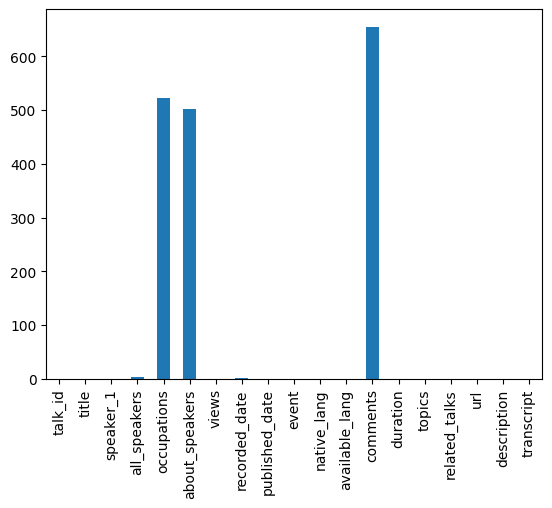

In [19]:
# Visualizing the missing values

null_values.plot(kind="bar")

## Observation -

**comments** , **occupations** and **about_speakers** columns are high missing values.



In [20]:
# checking for unique values

# checking unique native languages

ted_talk_df['native_lang'].unique()

array(['en', 'fr', 'de', 'pt', 'ko', 'zh-cn', 'ar', 'pt-br', 'es', 'ja',
       'it', 'hi'], dtype=object)

In [21]:
ted_talk_df.describe(percentiles=[.25,.50,.75,.80,.85,.90,.95,.96,.97,.98,.99])


,talk_id,views,comments,duration
count,4005.000000,4.005000e+03,3350.000000,4005.000000
mean,12432.538327,2.148006e+06,161.997015,724.011236
std,17447.576262,3.451226e+06,268.838922,361.775462
min,1.000000,0.000000e+00,0.000000,60.000000
25%,1252.000000,8.820690e+05,38.000000,393.000000
50%,2333.000000,1.375508e+06,89.000000,738.000000
75%,23777.000000,2.133110e+06,188.000000,974.000000
80%,24402.600000,2.475286e+06,227.000000,1020.000000
85%,32189.400000,3.019490e+06,275.000000,1072.000000
90%,44241.800000,3.994610e+06,351.100000,1133.000000


<Axes: >

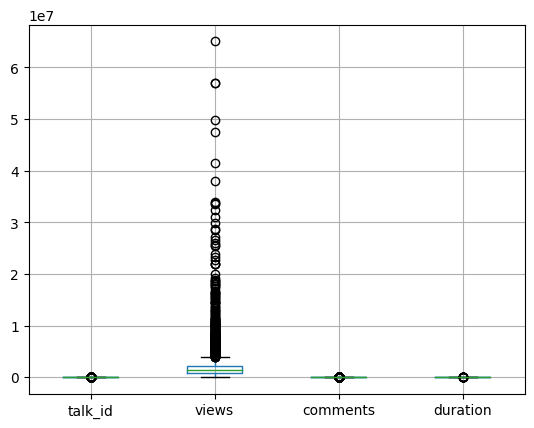

In [22]:
ted_talk_df.boxplot()


*   the minimum value of views is 0.
*   the minimum value of comments is also 0.
*   outliers in views, comments and duration column.


In [23]:
# find rows where column views have 0 value

ted_talk_df[ted_talk_df['views']==0]


,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,related_talks,url,description,transcript
2813,17850,Por qué necesitamos proteger el alta mar,Enric Sala,{0: 'Enric Sala'},{0: ['marine ecologist']},{0: 'Dr. Enric Sala is a former university pro...,0,2018-04-26,2018-06-06,TED en Español en NYC,es,"['en', 'es']",NaN,772,"['environment', 'economics', 'biosphere', 'nat...","{17733: ""Let's turn the high seas into the wor...",https://www.ted.com/talks/enric_sala_por_que_n...,Estamos pescando más rápido que la capacidad d...,If you randomly jumped in any point of the sea...
3056,29009,Cómo usar el arte de la fotografía para restau...,Alejandro Chaskielberg,{0: 'Alejandro Chaskielberg'},{0: ['photographer']},"{0: 'Alejandro Chaskielberg is a photographer,...",0,2018-11-05,2018-11-29,TEDxRiodelaPlata,es,"['en', 'es', 'pt']",NaN,862,"['art', 'photography', 'community', 'history',...",{2854: 'How your pictures can help reclaim los...,https://www.ted.com/talks/alejandro_chaskielbe...,¿Qué le puede suceder a la memoria cuando la e...,"Recently, my daughter and I decided to give aw..."
3068,29688,Por qué deberíamos comer más bichos,Renata di Tullio,{0: 'Renata di Tullio'},{0: ['técnica agropecuaria y agroalimentaria']},{0: 'Rena es Técnica Agropecuaria y Agroalimen...,0,2018-11-05,2018-12-07,TEDxRiodelaPlata,es,"['en', 'es', 'nl']",NaN,417,"['global issues', 'science', 'insects', 'food'...","{2427: 'The case for fish farming', 1018: 'Why...",https://www.ted.com/talks/renata_di_tullio_por...,"Have you ever considered crickets, houseflies ...",I'm passionate about insects for two reasons. ...
3520,43755,Can dogs sniff out malaria?,James Logan,{0: 'James Logan'},"{0: ['biologist', 'medical entomologist']}",{0: 'Professor James Logan leads an internatio...,0,2019-05-18,2019-06-11,TEDxLondon,en,"['en', 'pt-br', 'ru', 'zh-tw']",NaN,1099,"['health', 'public health', 'animals', 'smell'...",{1819: '3 reasons we still haven’t gotten rid ...,https://www.ted.com/talks/james_logan_can_dogs...,"Each year, hundreds of thousands of people aro...",Malaria is still one of the biggest killers on...
3790,55342,¿Como será el cine del futuro?,Diego Prilusky,{0: 'Diego Prilusky'},{0: ['productor audiovisual']},"{0: 'Diego viene del mundo de la producción, l...",0,2019-10-24,2019-12-19,TEDxRiodelaPlata,es,"['en', 'es', 'it']",NaN,743,"['technology', 'film', 'movies', 'entertainmen...","{1476: 'The shared wonder of film', 403: ""A to...",https://www.ted.com/talks/diego_prilusky_como_...,"Desde las películas western, hasta las cintas ...",The art of movies has existed for more than 10...
4004,62794,The most important anus in the ocean,Cella Wright,{0: 'Cella Wright'},NaN,NaN,0,2020-04-30,2020-04-30,TED-Ed,en,['en'],NaN,281,"['animals', 'TED-Ed', 'animation', 'oceans', '...","{62347: 'The bug that poops candy', 29159: 'In...",https://www.ted.com/talks/cella_wright_the_mos...,Is it a fuzzy sock? An overripe banana? A mold...,Can you guess what you’re looking at? Is it a ...


Here we found that total 6 rows has 0 in views column. we have to remove this.



In [24]:
# for the categorical (object) columns of a DataFrame.
ted_talk_df.describe(include='O').T


,count,unique,top,freq
title,4005,4005,Averting the climate crisis,1
speaker_1,4005,3274,Alex Gendler,34
all_speakers,4001,3306,{0: 'Alex Gendler'},34
occupations,3483,2049,{0: ['writer']},53
about_speakers,3502,2977,{0: 'Alex Rosenthal takes everyday experiences...,10
recorded_date,4004,1334,2017-04-24,97
published_date,4005,2962,2017-09-07,27
event,4005,459,TED-Ed,556
native_lang,4005,12,en,3957
available_lang,4005,3902,['en'],24


In [25]:
ted_talk_df[["speaker_1","all_speakers"]]

,speaker_1,all_speakers
0,Al Gore,{0: 'Al Gore'}
1,Hans Rosling,{0: 'Hans Rosling'}
2,David Pogue,{0: 'David Pogue'}
3,Majora Carter,{0: 'Majora Carter'}
4,Sir Ken Robinson,{0: 'Sir Ken Robinson'}
...,...,...
4000,Nancy Lublin,{0: 'Nancy Lublin'}
4001,Stefan C Dombrowski,{0: 'Stefan C Dombrowski'}
4002,Dick M. Carpenter II,{0: 'Dick M. Carpenter II'}
4003,Daina Ramey Berry,{0: 'Daina Ramey Berry'}


We can see that columns **speaker_1** and all_speakers are having same entry and details . So we have to drop one of the column.

### 1. Handling Missing Values

*Issues* to solve .

1.   missing values.
2.   incorrect data-types .
3.   droping the rows having 0 . (in views columns)
4.   removing extra column . (accuracy issues)





In [26]:
df.size , df.shape

(76095, (4005, 19))

`1. Missing vaue issues`

In [27]:
# fill missing value

values = {'comments':0,
          'occupations':'no data',
          'about_speakers': 'no data',
          'all_speakers' : 'no data'}

df = df.fillna(value=values)


In [28]:
df.isnull().sum()

talk_id           0
title             0
speaker_1         0
all_speakers      0
occupations       0
about_speakers    0
views             0
recorded_date     1
published_date    0
event             0
native_lang       0
available_lang    0
comments          0
duration          0
topics            0
related_talks     0
url               0
description       0
transcript        0
dtype: int64

`2. Incorrect data-types isssue`








In [29]:
# changing data-types of columns

df = df.astype({'comments':'int32', 'views':'int32', 'duration':'int32', 'talk_id':'int32'})

df['recorded_date']= pd.to_datetime(df['recorded_date'])

df['published_date']= pd.to_datetime(df['published_date'])

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4005 entries, 0 to 4004
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   talk_id         4005 non-null   int32         
 1   title           4005 non-null   object        
 2   speaker_1       4005 non-null   object        
 3   all_speakers    4005 non-null   object        
 4   occupations     4005 non-null   object        
 5   about_speakers  4005 non-null   object        
 6   views           4005 non-null   int32         
 7   recorded_date   4004 non-null   datetime64[ns]
 8   published_date  4005 non-null   datetime64[ns]
 9   event           4005 non-null   object        
 10  native_lang     4005 non-null   object        
 11  available_lang  4005 non-null   object        
 12  comments        4005 non-null   int32         
 13  duration        4005 non-null   int32         
 14  topics          4005 non-null   object        
 15  rela

data-type is changed

`3. Droping Rows and Columns not needed`





In [31]:
# we drop all_speakers column because this column duplicate of speaker_1 and also drop url column (not needed)

df.drop(['all_speakers', 'url', 'talk_id'], axis=1, inplace=True)

# rename column speaker_1 to speaker

df.rename(columns={'speaker_1': 'speaker'}, inplace=True)

In [32]:
df[:1]

,title,speaker,occupations,about_speakers,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,related_talks,description,transcript
0,Averting the climate crisis,Al Gore,{0: ['climate advocate']},{0: 'Nobel Laureate Al Gore focused the world’...,3523392,2006-02-25,2006-06-27,TED2006,en,"['ar', 'bg', 'cs', 'de', 'el', 'en', 'es', 'fa...",272,977,"['alternative energy', 'cars', 'climate change...","{243: 'New thinking on the climate crisis', 54...",With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre..."


In [33]:
# we simply drop that 6 rows where value of views columns is 0.

df =df[df['views']!=0]


In [34]:
df[df['views']==0]


,title,speaker,occupations,about_speakers,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,related_talks,description,transcript


No result found shows that we drop that rows

In [35]:
# now after cleaning checking our dataset

df.shape , df.size

((3999, 16), 63984)

We have 3999 rows and 16 columns in our df dataset.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

In [36]:
numeric_features = df.describe().columns
numeric_features

Index(['views', 'comments', 'duration'], dtype='object')

# Visulization of Numerical Parts

In [37]:
# Dataset Columns

df.columns

Index(['title', 'speaker', 'occupations', 'about_speakers', 'views',
       'recorded_date', 'published_date', 'event', 'native_lang',
       'available_lang', 'comments', 'duration', 'topics', 'related_talks',
       'description', 'transcript'],
      dtype='object')

In [38]:
# removing the column not required
df.drop(['occupations', 'about_speakers', 'related_talks','description','transcript'], axis=1, inplace=True)


In [39]:
df.sample(2)

,title,speaker,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics
1527,The art of misdirection,Apollo Robbins,27208963,2013-06-12,2013-09-13,TEDGlobal 2013,en,"['ar', 'bg', 'cs', 'da', 'de', 'el', 'en', 'es...",308,527,"['crime', 'entertainment']"
1775,The courage to tell a hidden story,Eman Mohammed,1480399,2014-03-14,2014-09-24,TED2014,en,"['ar', 'bg', 'cs', 'de', 'el', 'en', 'es', 'fa...",184,252,"['Middle East', 'TED Fellows', 'gender', 'glob..."


# `title`




In [40]:
# Find top 10 popular talk show titles and speaker based on views

top_10_talk = df [["title","speaker","views"]].sort_values('views',ascending =False).head(10)
top_10_talk


,title,speaker,views
4,Do schools kill creativity?,Sir Ken Robinson,65051954
1296,Your body language may shape who you are,Amy Cuddy,57074270
2062,This is what happens when you reply to spam email,James Veitch,56932551
646,How great leaders inspire action,Simon Sinek,49730580
796,The power of vulnerability,Brené Brown,47544833
1724,How to speak so that people want to listen,Julian Treasure,41504331
2108,Inside the mind of a master procrastinator,Tim Urban,37976820
1366,"Looks aren't everything. Believe me, I'm a model.",Cameron Russell,33874546
2724,My philosophy for a happy life,Sam Berns,33691484
1898,The next outbreak? We're not ready,Bill Gates,33521780



Observations :-

Ken Robinson's talk on Do Schools Kill Creativity? is the most popular TED Talk of all time with 65.05 million views.
Also coincidentally, it is also one of the first talks to ever be uploaded on the TED Site (the main dataset is sorted by published date).
Robinson's talk is closely followed by Amy Cuddy's talk on Your Body Language May Shape Who You Are.
There are only 3 talks that have surpassed the 50 million mark and 12 talks that have crossed the 30 million mark.

#### Chart - 1

<function matplotlib.pyplot.show(close=None, block=None)>

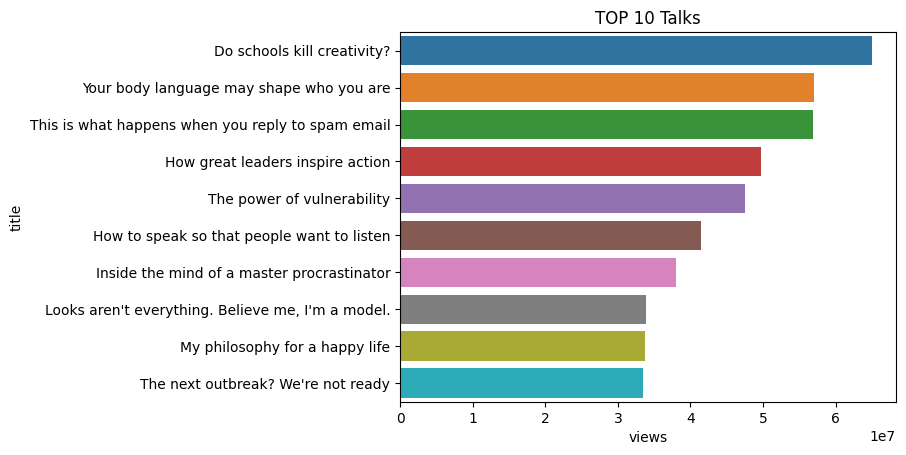

In [41]:
sns.barplot(x="views",y="title",data=top_10_talk)
plt.title("TOP 10 Talks")
plt.show

#####  What is/are the insight(s) found from the chart?




Observations :-


"Do school kill ceartivity ?" talk shows is in top according to views



# `Speaker`

In [42]:
#top 10 speakers by views and by comments

# by views

top10_views = df.groupby('speaker').views.sum().nlargest(10)
top10_views = top10_views.reset_index()

# by comments

top10_comments = df.groupby('speaker').comments.sum().nlargest(10)
top10_comments = top10_comments.reset_index()


#### Chart - 2

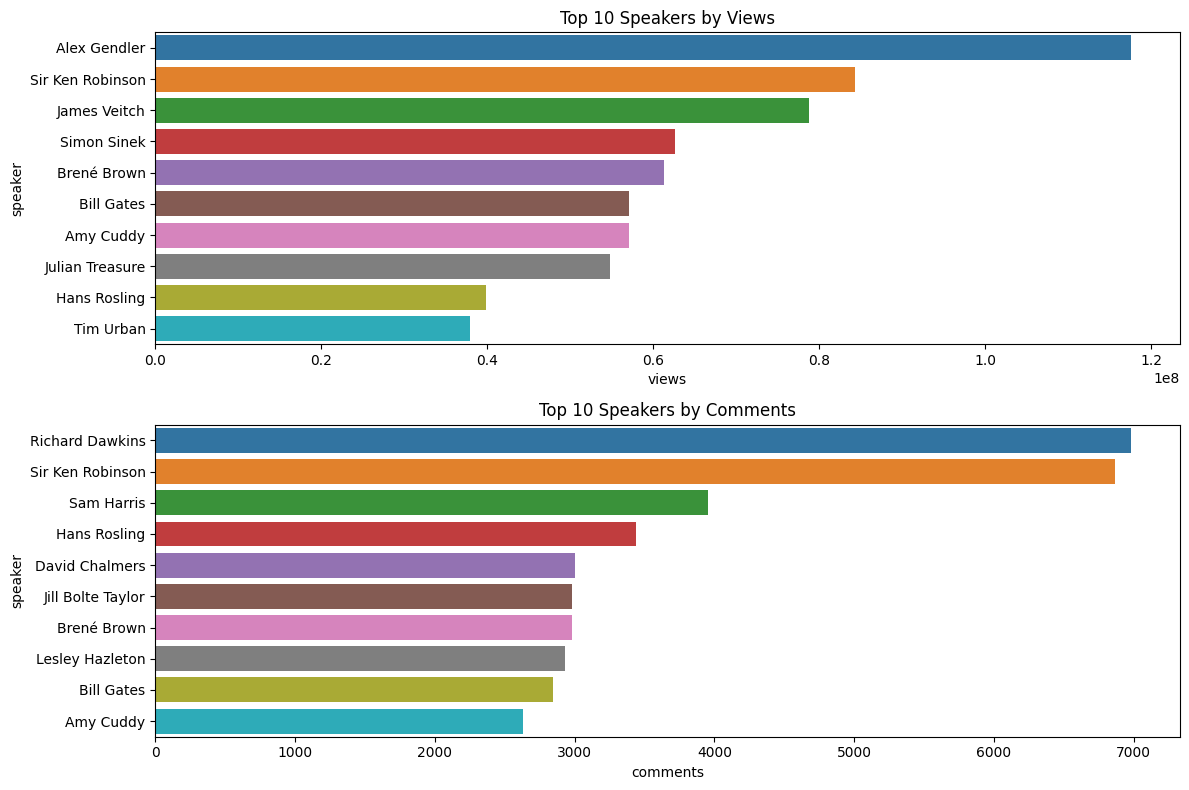

In [43]:
# create the figure and subplots

fig, axs = plt.subplots(2,1, figsize=(12,8))

# create a barplot with top 15 speakers by views

sns.barplot(x='views', y='speaker', data=top10_views, ax=axs[0])
axs[0].set_title('Top 10 Speakers by Views')

# create a barplot with top 10 speakers by comments
sns.barplot(x='comments', y='speaker', data=top10_comments, ax=axs[1])
axs[1].set_title('Top 10 Speakers by Comments')


plt.tight_layout()
plt.show()


#####  What is/are the insight(s) found from the chart?



Observation -


1. According to Views the top speakers are-

*   Alex Gendler  
*   Sri Ken Robinson
*   James Veitch


2. According to Comments top Speakers are -

*   Richard Dawkins
*   Sri Ken Robinson
*   Sam Harris











## Spaeaker v/s Duration

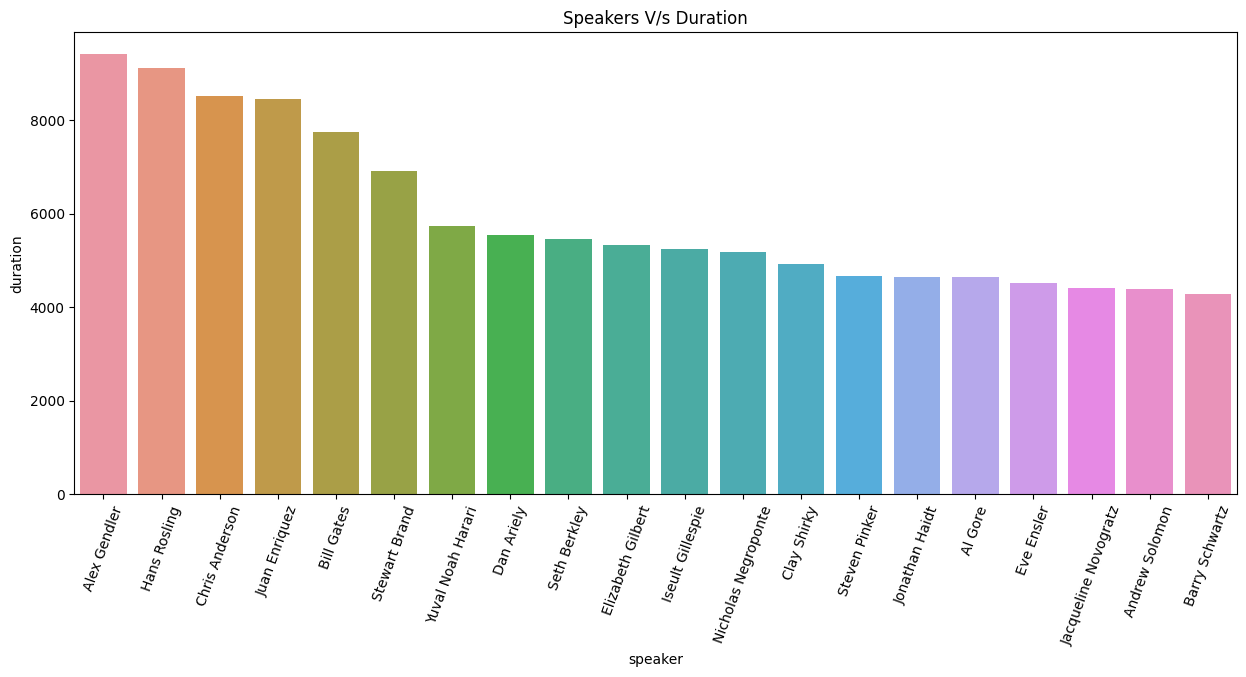

In [44]:
temp=df.groupby(['speaker'],as_index=False)['duration'].sum().sort_values('duration',ascending=False)[:20]
temp

# ploting a graph spaeker v/s duration
plt.figure(figsize=(15,6))
ax=sns.barplot(x='speaker',y='duration',data=temp)
labels=ax.get_xticklabels()
plt.title("Speakers V/s Duration")
plt.setp(labels, rotation=70);

In [45]:
df.head(5)

,title,speaker,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics
0,Averting the climate crisis,Al Gore,3523392,2006-02-25,2006-06-27,TED2006,en,"['ar', 'bg', 'cs', 'de', 'el', 'en', 'es', 'fa...",272,977,"['alternative energy', 'cars', 'climate change..."
1,The best stats you've ever seen,Hans Rosling,14501685,2006-02-22,2006-06-27,TED2006,en,"['ar', 'az', 'bg', 'bn', 'bs', 'cs', 'da', 'de...",628,1190,"['Africa', 'Asia', 'Google', 'demo', 'economic..."
2,Simplicity sells,David Pogue,1920832,2006-02-24,2006-06-27,TED2006,en,"['ar', 'bg', 'de', 'el', 'en', 'es', 'fa', 'fr...",124,1286,"['computers', 'entertainment', 'interface desi..."
3,Greening the ghetto,Majora Carter,2664069,2006-02-26,2006-06-27,TED2006,en,"['ar', 'bg', 'bn', 'ca', 'cs', 'de', 'en', 'es...",219,1116,"['MacArthur grant', 'activism', 'business', 'c..."
4,Do schools kill creativity?,Sir Ken Robinson,65051954,2006-02-25,2006-06-27,TED2006,en,"['af', 'ar', 'az', 'be', 'bg', 'bn', 'ca', 'cs...",4931,1164,"['children', 'creativity', 'culture', 'dance',..."


## Language of talk shows

<Axes: >

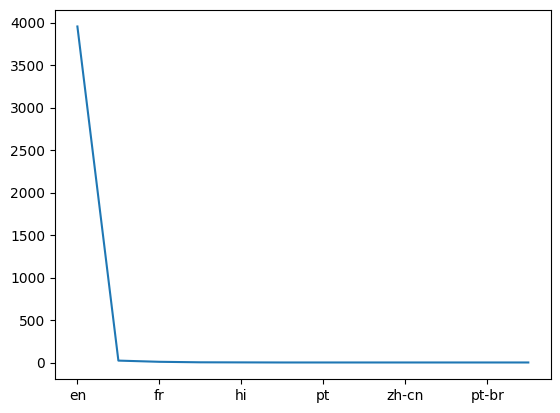

In [46]:
a=df.native_lang.value_counts()
a.plot(kind='line')

Observation -

by line plot we can easily see that english laguage is used in maximum talk shows by speakers.

## now, we focus on numerical columns first and deal with outliers, null values and then check skewness of the columns.





#` comments`

<Axes: xlabel='comments', ylabel='views'>

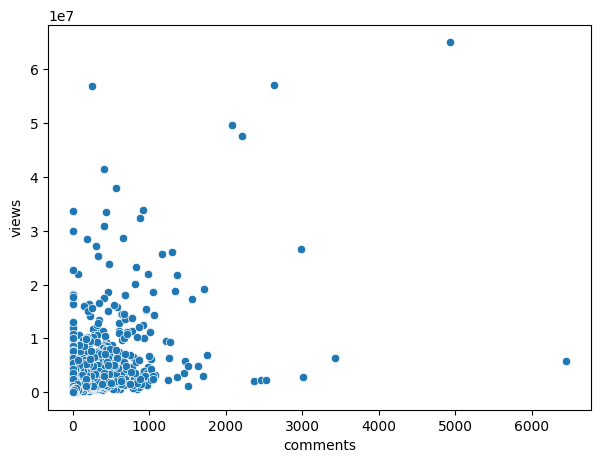

In [47]:
#checking corr. with views column

plt.figure(figsize=(7,5))
sns.scatterplot(x='comments', y='views', data=df)


Observation -


*   From the above graph it is clear that comments and views both are rightly skewed and they both have somewhat of a similar distributions. This might signify some linear correlation.

*   Also as previously seen comments have a lot of NaN values and also distribution is highly skewed to the right side indicating some outliers. So lets deal with those issues too.

<Axes: xlabel='comments', ylabel='Density'>

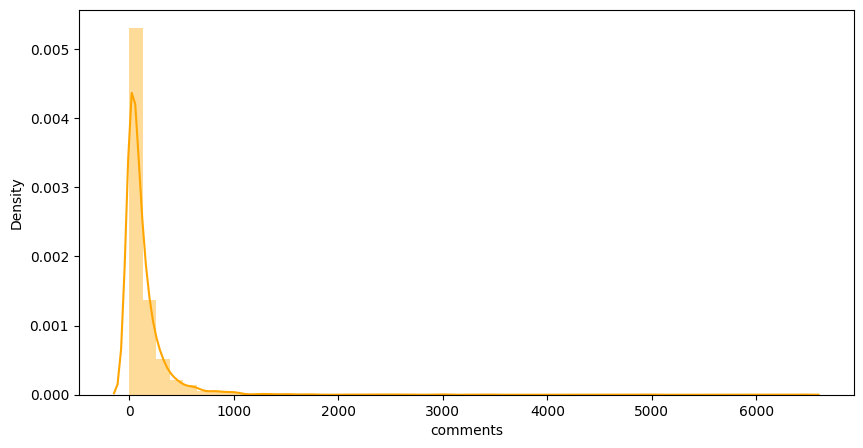

In [48]:

# check distribution of comments column

plt.figure(figsize=(10,5))
sns.distplot(df['comments'], color ='orange')

Observations :-


*   the comments column is also highly right skew..we have to apply log transformation when we make pipeline.

*   there are some outliers in this column we have to remove them or use some technique to fill that outliers with other values.

<Axes: >

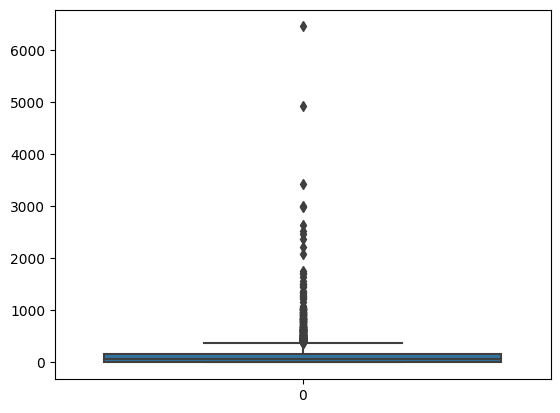

In [49]:
sns.boxplot(df["comments"])

In [50]:
print(len(df[df['comments'] > 1100]))

29


In [51]:
#remove outliers of comments column

df.drop(df[df['comments'] > 1100].index, inplace=True)

In [52]:
df.shape

(3970, 11)

In [53]:
#fill null(0) value with median of column

df['comments']= df['comments'].replace(0, np.nan)
df["comments"].fillna(df["comments"].median(), axis = 0, inplace = True)

we use median to fill null values because median is better than mean in case of outliers so...


<Axes: xlabel='comments', ylabel='Density'>

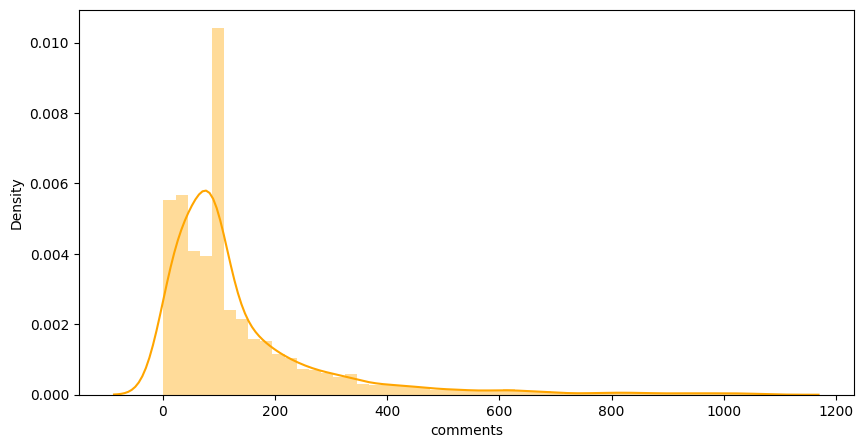

In [54]:

# plot distplot after remove outliers and fill null values

plt.figure(figsize=(10,5))
sns.distplot(df['comments'], color ='orange')

# `duration`

<Axes: xlabel='duration', ylabel='Density'>

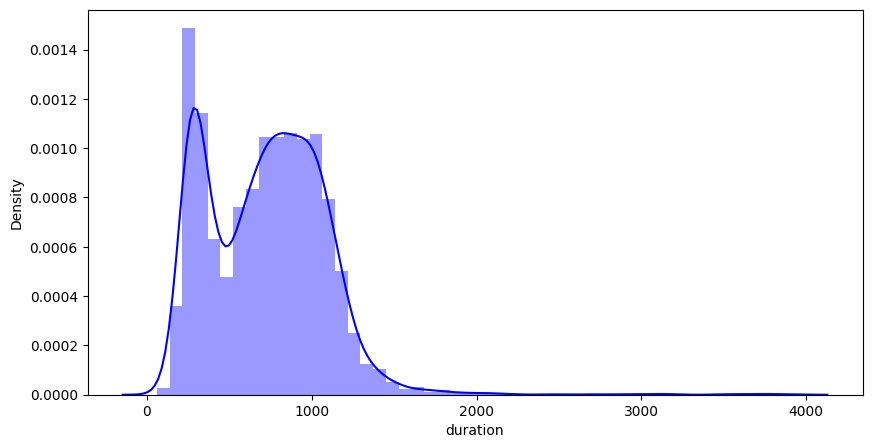

In [55]:

# check distribution of duration column

plt.figure(figsize=(10,5))
sns.distplot(df['duration'], color ='blue')


<Axes: xlabel='duration', ylabel='views'>

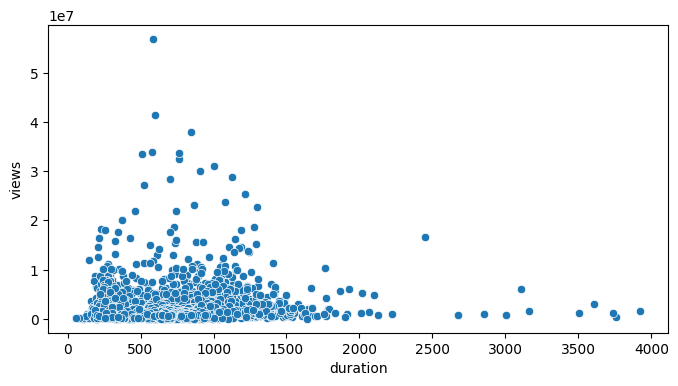

In [56]:
# check correlation of duration and views using scatter plot

plt.figure(figsize=(8,4))
sns.scatterplot(x='duration', y='views', data=df)


observations :-

From the above graph it is clear that duration and views columns are not correlated to each other.

in duration column also some outlier there.

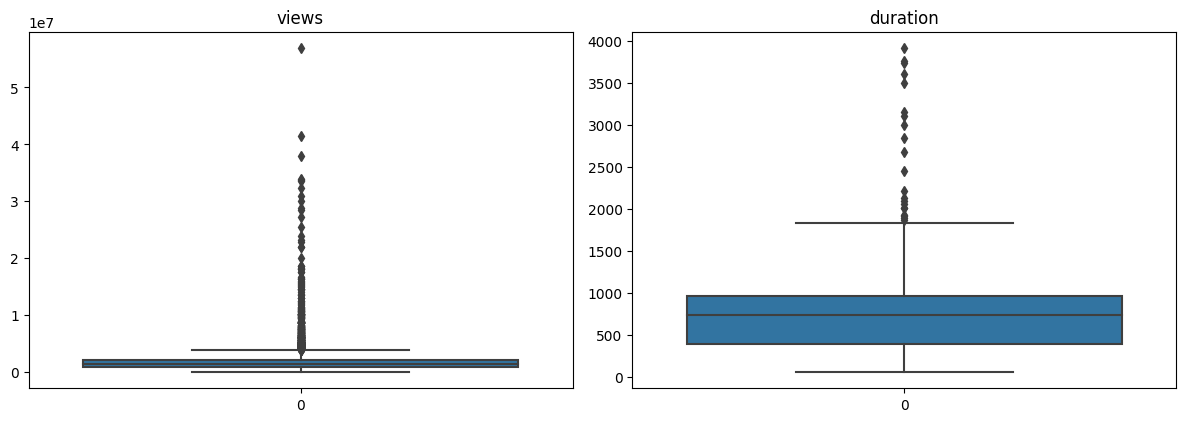

In [57]:

# checking duration and views columns Outliers using boxplot

columns = ['views', 'duration']
n = 1
plt.figure(figsize=(18,12))

for i in columns:
  plt.subplot(3,3,n)
  n=n+1
  sns.boxplot(df[i])
  plt.title(i)
  plt.tight_layout()



## Handaling Outliers

In [58]:
# treatment of outliers by IQR method

# Duration outliers

data_duration_iqr1=  df['duration'].quantile(0.75)-df['duration'].quantile(0.25)
df['duration']= df['duration'].mask(df['duration']>(df['duration'].quantile(0.75)+1.5*data_duration_iqr1), df['duration'].mean())

# Views Outliers

data_duration_iqr2=  df['views'].quantile(0.75)-df['views'].quantile(0.25)
df['views']= df['views'].mask(df['views']>(df['views'].quantile(0.75)+1.5*data_duration_iqr2), df['views'].mean())



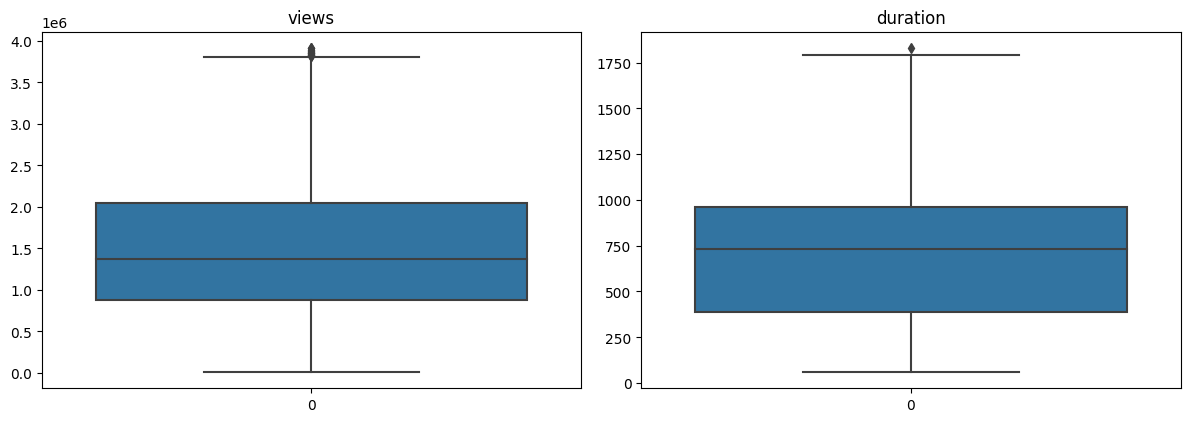

In [59]:
# let's see the numerical column again after treating outliers

columns = ['views', 'duration']
n = 1
plt.figure(figsize=(18,12))

for i in columns:
  plt.subplot(3,3,n)
  n=n+1
  sns.boxplot(df[i])
  plt.title(i)
  plt.tight_layout()


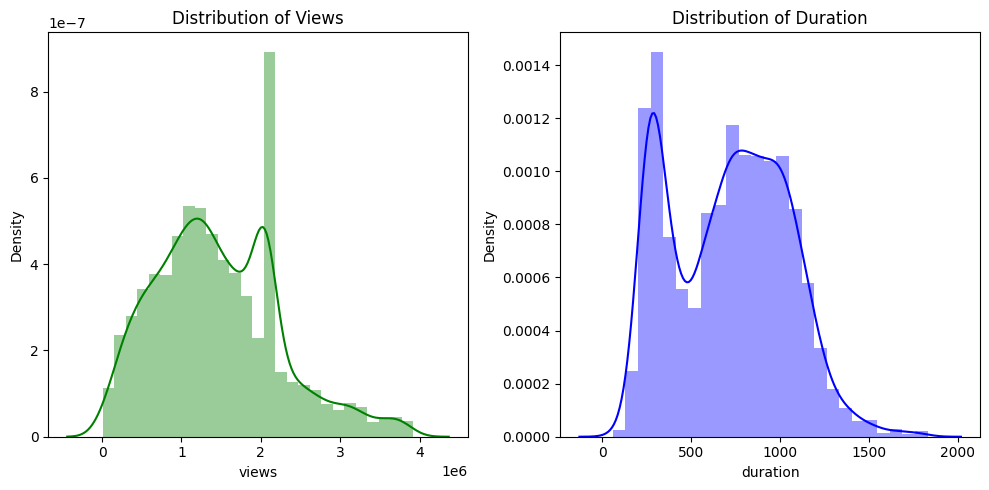

In [60]:
# after fill outliers with mean... distribution graph of columns views and duration

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

sns.distplot(df['views'], color='green', ax=axs[0])
axs[0].set_title('Distribution of Views')

sns.distplot(df['duration'], color='blue', ax=axs[1])
axs[1].set_title('Distribution of Duration')


plt.tight_layout()
plt.show()

In [61]:
df.head(2)

,title,speaker,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics
0,Averting the climate crisis,Al Gore,3.523392e+06,2006-02-25,2006-06-27,TED2006,en,"['ar', 'bg', 'cs', 'de', 'el', 'en', 'es', 'fa...",272.0,977.0,"['alternative energy', 'cars', 'climate change..."
1,The best stats you've ever seen,Hans Rosling,2.051773e+06,2006-02-22,2006-06-27,TED2006,en,"['ar', 'az', 'bg', 'bn', 'bs', 'cs', 'da', 'de...",628.0,1190.0,"['Africa', 'Asia', 'Google', 'demo', 'economic..."


In [62]:
df.columns

Index(['title', 'speaker', 'views', 'recorded_date', 'published_date', 'event',
       'native_lang', 'available_lang', 'comments', 'duration', 'topics'],
      dtype='object')

In [63]:
# Now according to views we define speakers popularity  as popular ,avg popular , high popular etc.

# Create a new column 'speaker_popularity' in the main DataFrame and assign the categories

df['speaker_popularity'] = ""
df.loc[df['views'] <= 500000, 'speaker_popularity'] = 'not_popular'
df.loc[(df['views'] > 500000) & (df['views'] <= 1500000), 'speaker_popularity'] = 'avg_popular'
df.loc[(df['views'] > 1500000) & (df['views'] <= 2500000), 'speaker_popularity'] = 'popular'
df.loc[(df['views'] > 2500000) & (df['views'] <= 3500000), 'speaker_popularity'] = 'high_popular'
df.loc[df['views'] > 3500000, 'speaker_popularity'] = 'extreme_popular'

# check the dataset

df.sample(2)

,title,speaker,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,speaker_popularity
2913,Una nueva manera de hablar del fracaso en los ...,Leticia Gasca,15531.0,2018-04-26,2018-08-23,TED en Español en NYC,es,"['en', 'es']",88.0,790.0,"['business', 'entrepreneur', 'failure', 'commu...",not_popular
1517,A mouse. A laser beam. A manipulated memory.,Steve Ramirez,1133520.0,2013-06-25,2013-08-15,TEDxBoston,en,"['ar', 'bg', 'cs', 'da', 'de', 'el', 'en', 'es...",338.0,925.0,"['TEDx', 'animals', 'memory', 'neuroscience']",avg_popular


In [64]:
b=df.speaker_popularity.value_counts()
b

avg_popular        1775
popular            1399
not_popular         433
high_popular        294
extreme_popular      69
Name: speaker_popularity, dtype: int64

Text(0.5, 1.0, 'Ted Talks Shows Ppularity according to Views')

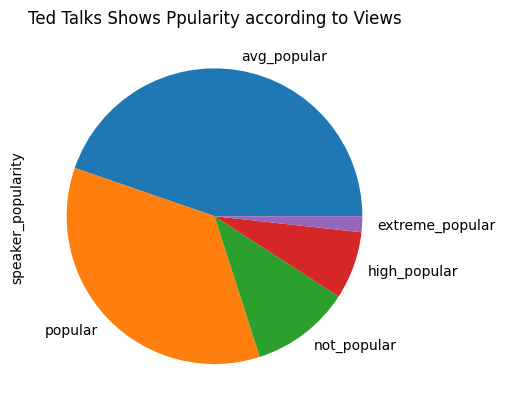

In [65]:
b.plot(kind="pie")
plt.title("Ted Talks Shows Ppularity according to Views")


<Axes: xlabel='speaker_popularity', ylabel='comments'>

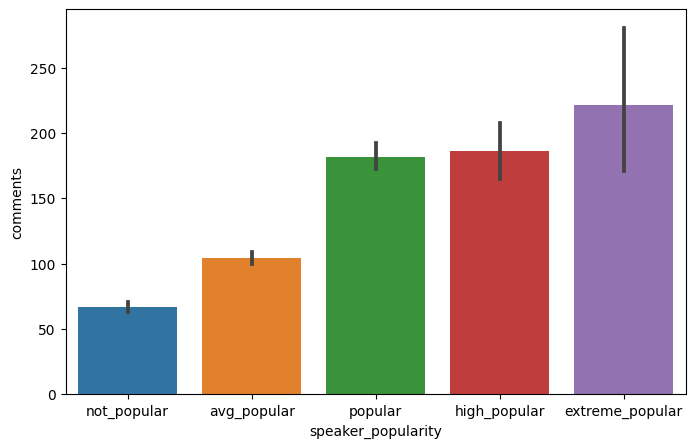

In [66]:
plt.figure(figsize=(8,5))
sns.barplot(data=df, x='speaker_popularity', y='comments',
            order=['not_popular', 'avg_popular', 'popular', 'high_popular', 'extreme_popular'])


observations :-

We can observe that this speaker popularity column has a strong correlation with the comments column in an ordinal manner. This means that as the number of comments on a TED Talk video increases, the popularity of the speaker also tends to increase.

Based on this observation, we can say that the number of views for a TED Talk video is also predictable in certain scenarios.

However, there are no other good columns available in the dataset that can be modified or used to create new columns for better prediction models.

To improve the prediction model, we can consider including features such as speaker ratings on TED Talks, similar to how there are rating systems for instructors in ALMAbetter.

These ratings can help in understanding the quality of the talk and the popularity of the speaker, which could be important factors in predicting the number of views.

In [67]:
df.head(2)

,title,speaker,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,speaker_popularity
0,Averting the climate crisis,Al Gore,3.523392e+06,2006-02-25,2006-06-27,TED2006,en,"['ar', 'bg', 'cs', 'de', 'el', 'en', 'es', 'fa...",272.0,977.0,"['alternative energy', 'cars', 'climate change...",extreme_popular
1,The best stats you've ever seen,Hans Rosling,2.051773e+06,2006-02-22,2006-06-27,TED2006,en,"['ar', 'az', 'bg', 'bn', 'bs', 'cs', 'da', 'de...",628.0,1190.0,"['Africa', 'Asia', 'Google', 'demo', 'economic...",popular


In [68]:
#  finding the range of number of comments max to min
df["comments"].max(), df.comments.min()

(1081.0, 1.0)

In [69]:
# Now I categorized the viedos acoording to their number of comments

# Create a new column 'video_rating' in the main DataFrame and assign the categories

df['video_rating'] = ""
df.loc[df['comments'] <= 100, 'video_rating'] = 1
df.loc[(df['comments'] > 100) & (df['comments'] <= 200), 'video_rating'] = 2
df.loc[(df['comments'] > 200) & (df['comments'] <= 400), 'video_rating'] = 3
df.loc[(df['comments'] > 400) & (df['comments'] <= 600), 'video_rating'] = 4
df.loc[df['comments'] > 600, 'video_rating'] = 5

# check the dataset
df.sample(2)


,title,speaker,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,speaker_popularity,video_rating
2732,"Undocumented lives, inside out",JR,10004.0,2018-04-04,2018-04-03,Torchbearers,en,"['ar', 'en', 'es', 'fr', 'ja', 'ko', 'pt-br', ...",88.0,327.0,"['community', 'photography', 'art', 'activism'...",not_popular,1
218,The thinking behind 50x15,Hector Ruiz,341962.0,2007-06-06,2008-05-01,TEDGlobal 2007,en,"['ar', 'bg', 'de', 'en', 'es', 'fr', 'he', 'hu...",32.0,1197.0,"['Africa', 'education', 'global issues', 'phil...",not_popular,1


In [70]:
df.video_rating.value_counts()

1    2463
2     756
3     501
4     143
5     107
Name: video_rating, dtype: int64


observations :-

*   One of the main ways people engage with content on social media platforms, including video sharing platforms like YouTube, is by leaving comments.

*   Comments can be a measure of engagement and audience interest in the content, as people who leave comments are often invested in the topic and want to express their thoughts or feedback.
*   In the case of TED Talks, comments can be an indicator of the quality and impact of the speaker's presentation, as well as the relevance and resonance of the topic with the audience


*   Therefore, it can be hypothesized that videos with higher comments are more likely to be well-received and impactful, and thus may be rated more highly by viewers.


*   Based on this idea, we can create a new column 'video_rating' in the dataset, which can be assigned rating based on the number of comments a talk has received.





# `available_lang`

In [71]:
# add new column available_languages using existing column available_lang

df['available_languages'] = df['available_lang'].apply(lambda x: len(x))
pd.DataFrame(df['available_languages'])

,available_languages
0,270
1,303
2,165
3,219
5,123
...,...
3999,27
4000,6
4001,27
4002,6


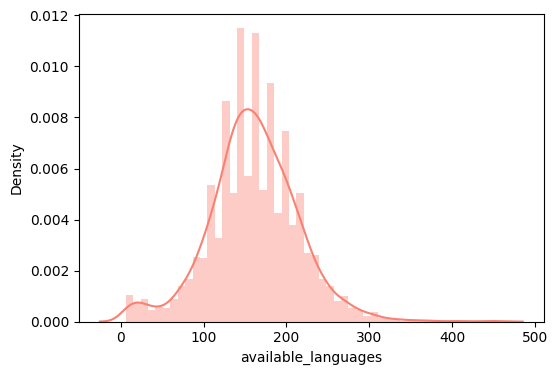

In [72]:

# check the distribution of this new column available_languages

plt.figure(figsize=(6,4))
sns.distplot(df['available_languages'],color = 'salmon')
plt.show()


little-bit of right skewed and in-middle also more values.


# `topic`

In [73]:
import ast

df_1=df.copy()

df_1['topics'] = df_1['topics'].apply(lambda x: ast.literal_eval(x))
s = df_1.apply(lambda x: pd.Series(x['topics']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'topic'

df_1 = df_1.drop('topics', axis=1).join(s)


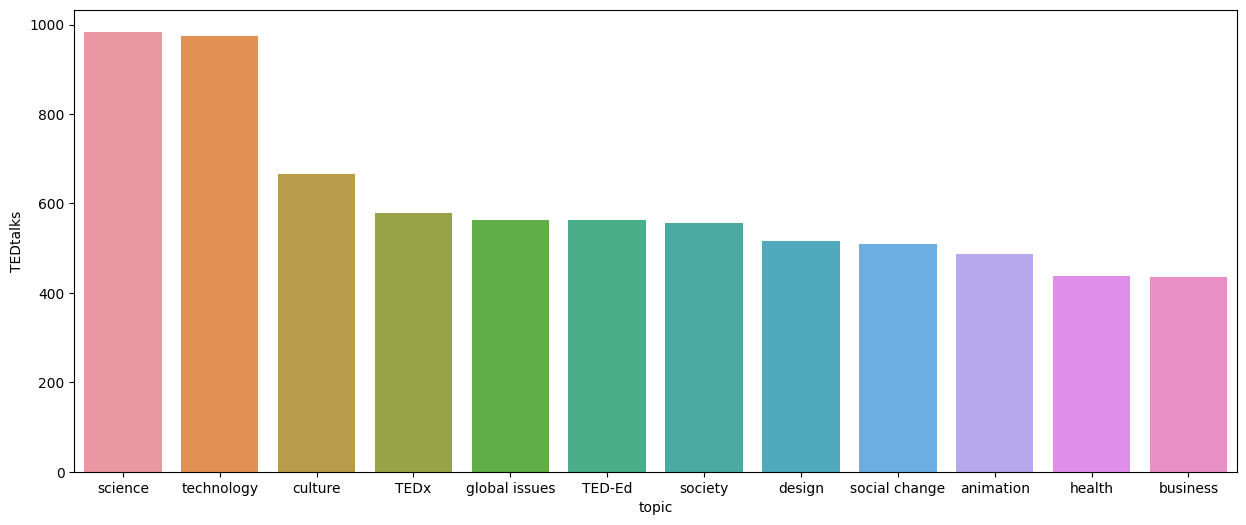

In [74]:
# plot a bar chart of popular topics of TEDx Website

pop_topic = pd.DataFrame(df_1['topic'].value_counts()).reset_index()
pop_topic.columns = ['topic', 'TEDtalks']

plt.figure(figsize=(15,6))
sns.barplot(x='topic', y='TEDtalks', data=pop_topic.head(12))
plt.show()


observations :-

As may have been expected, science and Technology is the most popular topics for talks. Culture and Global Issues are also the popular topics respectively.

# `published_date`

In [75]:

# Making seperate column for day, month and year of upload

df['published_year'] = df['published_date'].dt.year
df['published_month'] = df['published_date'].dt.month
df['published_day'] = df["published_date"].dt.day_name()

# storing weekdays in order of numbers from 0 to 6 value

daydict = {'Sunday' : 0, 'Monday' : 1, 'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5,'Saturday':6}

# making new column holding information of day number

df['published_daynumber'] = df['published_day'].map(daydict)


# add one more column published_months_ago

df['published_months_ago'] = ((2023 - df['published_year'])*12 + df['published_month'])

In [76]:
df.sample(1)

,title,speaker,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,speaker_popularity,video_rating,available_languages,published_year,published_month,published_day,published_daynumber,published_months_ago
802,The 3 A's of awesome,Neil Pasricha,3230395.0,2010-09-30,2011-01-07,TEDxToronto 2010,en,"['ar', 'bg', 'cs', 'de', 'el', 'en', 'es', 'fa...",606.0,1053.0,"['TEDx', 'happiness', 'life', 'love', 'persona...",high_popular,5,225,2011,1,Friday,5,145


# Feature selection

In [77]:
df.columns

Index(['title', 'speaker', 'views', 'recorded_date', 'published_date', 'event',
       'native_lang', 'available_lang', 'comments', 'duration', 'topics',
       'speaker_popularity', 'video_rating', 'available_languages',
       'published_year', 'published_month', 'published_day',
       'published_daynumber', 'published_months_ago'],
      dtype='object')

In [78]:
df.shape

(3970, 19)

In [79]:
# dropping the columns no needed
df.drop(labels = ["speaker", "title", "recorded_date", "published_date", "event", "native_lang", "available_lang", "topics"],axis = 1, inplace = True)


In [80]:
df.sample(1)

,views,comments,duration,speaker_popularity,video_rating,available_languages,published_year,published_month,published_day,published_daynumber,published_months_ago
1419,1561595.0,743.0,1099.0,popular,5,165,2013,4,Wednesday,3,124


In [81]:
df.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 3970 entries, 0 to 4003
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   views                 3970 non-null   float64
 1   comments              3970 non-null   float64
 2   duration              3970 non-null   float64
 3   speaker_popularity    3970 non-null   object 
 4   video_rating          3970 non-null   object 
 5   available_languages   3970 non-null   int64  
 6   published_year        3970 non-null   int64  
 7   published_month       3970 non-null   int64  
 8   published_day         3970 non-null   object 
 9   published_daynumber   3970 non-null   int64  
 10  published_months_ago  3970 non-null   int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 501.2+ KB


In [82]:
# again change data-types of columns

df = df.astype({'comments':'int64', 'views':'int64','video_rating':'int64'})

df = df.astype({
    'speaker_popularity': 'category',
    'published_day': 'category'
})

<Axes: >

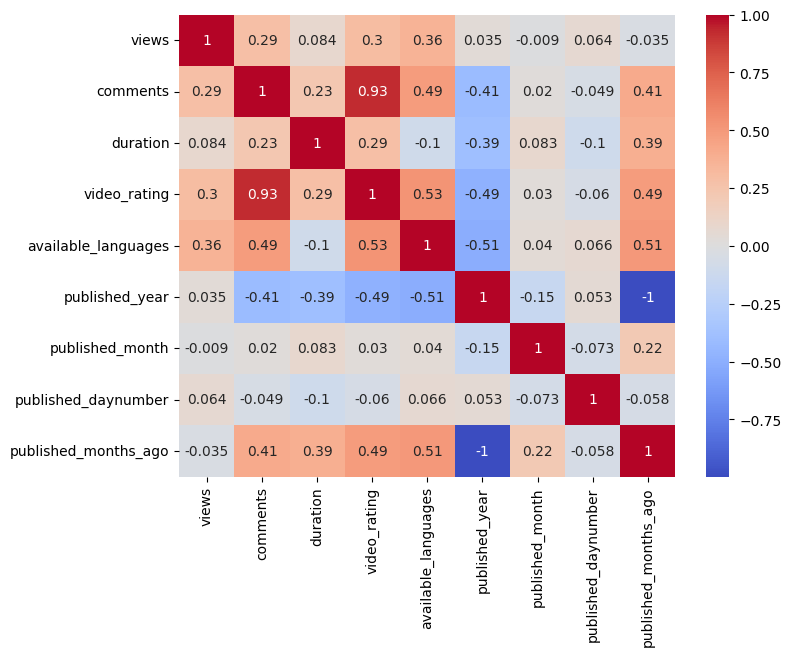

In [83]:

# Plotting correlation  matrix for all features with respect to target variable
correlmap = df.corr()
f, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(correlmap, annot=True, ax = ax,cmap="coolwarm")

## Now we go for  Multicollinearity

VIF (Variance Inflation Factor) is a measure used to assess multicollinearity in regression analysis. It helps identify if there is high correlation among predictor variables, which can cause issues in the regression model. A high VIF indicates that a predictor variable is highly correlated with other variables, potentially leading to unstable and unreliable coefficient estimates.

In [108]:
# importing VIF (variance inflation factor)

from statsmodels.stats.outliers_influence import variance_inflation_factor

# create a new DataFrame with only numeric columns
numeric_cols = df.select_dtypes(include=['int64', 'int32', 'float32', 'float64']).drop(['views'], axis=1)

# calculate VIF for each column
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(numeric_cols.values, i) for i in range(numeric_cols.shape[1])]
vif["features"] = numeric_cols.columns

# print the results
vif


,VIF Factor,features
0,7.235936,comments
1,1.523785,duration
2,8.305008,video_rating
3,2.003923,available_languages
4,25.694700,published_year
5,4.396649,published_month
6,1.027440,published_daynumber
7,11.493489,published_months_ago


We can see that columns "published_year" and "published_months_ago" are highly correlated with each other and have high VIF. We can remove one of these columns and check VIF again

In [110]:

# Step 1: drop published_months_ago , published_month , published_year , video_rating columns

df.drop(['published_year','published_month', 'published_months_ago','video_rating'], axis=1, inplace=True)


# Step 2: calculate VIF

numeric_cols = df.select_dtypes(include=['int64', 'int32', 'float32', 'float64']).drop(['views'], axis=1)
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(numeric_cols.values, i) for i in range(numeric_cols.shape[1])]
vif["features"] = numeric_cols.columns


# print the results

vif



,VIF Factor,features
0,2.383419,comments
1,3.886106,duration
2,6.844579,available_languages
3,4.338249,published_daynumber


In [111]:

df.skew()


views                  0.556902
comments               2.779550
duration               0.143467
available_languages    0.102257
published_daynumber   -0.025308
dtype: float64

In [112]:
df.columns

Index(['views', 'comments', 'duration', 'speaker_popularity',
       'available_languages', 'published_day', 'published_daynumber'],
      dtype='object')

In [113]:
df.sample(2)

,views,comments,duration,speaker_popularity,available_languages,published_day,published_daynumber
3608,2251285,56,700.0,popular,129,Thursday,4
2057,2051773,884,766.0,popular,279,Wednesday,3


In [85]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3970 entries, 0 to 4003
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   views                 3970 non-null   int64   
 1   comments              3970 non-null   int64   
 2   duration              3970 non-null   float64 
 3   speaker_popularity    3970 non-null   category
 4   video_rating          3970 non-null   int64   
 5   available_languages   3970 non-null   int64   
 6   published_year        3970 non-null   int64   
 7   published_month       3970 non-null   int64   
 8   published_day         3970 non-null   category
 9   published_daynumber   3970 non-null   int64   
 10  published_months_ago  3970 non-null   int64   
dtypes: category(2), float64(1), int64(8)
memory usage: 447.5 KB


### What all manipulations have you done and insights you found?

Answer Here.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

**bold text**#### Chart - 1

In [86]:
# Chart - 1 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 2

In [87]:
# Chart - 2 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3

In [88]:
# Chart - 3 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

In [89]:
# Chart - 4 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

In [90]:
# Chart - 5 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

In [91]:
# Chart - 6 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

In [92]:
# Chart - 7 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

In [93]:
# Chart - 8 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [94]:
# Chart - 9 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [95]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [96]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [97]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [98]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [99]:
# Correlation Heatmap visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot

In [100]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [101]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [102]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [103]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

In [104]:
#  Adding a daily views column for further analysis:

# importing Datetime
from datetime import datetime
import calendar


# Setting the Datetime formate:
today = datetime.now()
today.strftime('%Y-%m-%d')

'2023-07-04'

In [105]:
df

,views,comments,duration,speaker_popularity,video_rating,available_languages,published_year,published_month,published_day,published_daynumber,published_months_ago
0,3523392,272,977.0,extreme_popular,3,270,2006,6,Tuesday,2,210
1,2051773,628,1190.0,popular,5,303,2006,6,Tuesday,2,210
2,1920832,124,1286.0,popular,2,165,2006,6,Tuesday,2,210
3,2664069,219,1116.0,high_popular,3,219,2006,6,Tuesday,2,210
5,1208138,48,1198.0,avg_popular,1,123,2006,7,Monday,1,211
...,...,...,...,...,...,...,...,...,...,...,...
3999,760969,37,941.0,avg_popular,1,27,2020,4,Friday,5,40
4000,502934,6,690.0,avg_popular,1,6,2020,4,Monday,1,40
4001,307187,88,346.0,not_popular,1,27,2020,4,Monday,1,40
4002,464414,9,774.0,not_popular,1,6,2020,4,Tuesday,2,40


In [106]:

# Recorded date fromate:
df['recorded_date']= pd.to_datetime(df['recorded_date'])

# Formating the published date time:
df['published_date']= pd.to_datetime(df['published_date'])

# Period of day's talk has been published:
last_publishing_date = df['published_date'].max()

df['time_since_published'] = last_publishing_date - pd.DatetimeIndex(df['published_date'])

KeyError: ignored

In [ ]:

month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
day_order   = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

In [ ]:
import datetime
df['month'] = pd.DatetimeIndex(df['published_date']).month
df['month'] = df['month'].apply(lambda x: calendar.month_abbr[x])
df['year'] = pd.DatetimeIndex(df['published_date']).year
df['day'] = pd.DatetimeIndex(df['published_date']).day
df['week_day']= df['published_date'].apply(lambda x: day_order[datetime.date(x.year, x.month, x.day).weekday()])

In [ ]:
# Creating a Daily View column


# Daily views/Talk:
df['daily_views'] = df['views'] / ( df['time_since_published'].apply(lambda x : x.days) + 1 )

In [ ]:
df.head(2)

## Categarising Variable types:

In [ ]:

data_categorical= f[['title', 'speaker_1', 'all_speakers', 'occupations', 'about_speakers', 'native_lang', 'available_lang', 'comments', 'topics', 'related_talks', 'url', 'description', 'transcript']]
data_numerical= data[['talk_id','views', 'duration']]

data_target_variable= data[['views']]

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments

# Aplying Outlier treatment on duration and number of Languages:

sns.boxplot(df['duration'])


In [ ]:
data_duration_iqr=  df['duration'].quantile(0.75)-df['duration'].quantile(0.25)
df['duration']= df['duration'].mask(df['duration']>(df['duration'].quantile(0.75)+1.5*data_duration_iqr), df['duration'].mean())


In [ ]:
sns.boxplot(df['duration'])

we can see we remove the outliers by using Quartile method

##### What all outlier treatment techniques have you used and why did you use those techniques?

 I used interquartile Method (IQR) because:-

 The interquartile range is the best measure of variability for skewed distributions or data sets with outliers. Because it’s based on values that come from the middle half of the distribution, it’s unlikely to be influenced by outliers.

In [ ]:
df.describe()

In [ ]:
sns.boxplot(df['comments'])

In [ ]:
sns.boxplot(df['views'])

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

In [ ]:
nlp_dataset= df.copy()

In [ ]:
nlp_dataset.columns


In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
sns.heatmap(nlp_dataset.corr(), annot= True, cmap= "autumn",ax=ax)
# plt.figure(figsize=(10,8))


#### 1. Expand Contraction

In [ ]:
# Expand Contraction

#### 2. Lower Casing

In [ ]:
# Lower Casing

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

In [ ]:
# Remove White spaces

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data

### 6. Data Scaling

In [ ]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why?

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***